In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from sklearn.preprocessing import LabelEncoder


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.tree import DecisionTreeClassifier


In [8]:
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
from sklearn.svm import SVC


In [10]:
import xgboost as xgb


In [11]:
from sklearn.metrics import f1_score

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
import warnings

In [18]:
import pickle

In [19]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/PS_20174392719_1491204439457_log.csv')

In [20]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [22]:
df.drop(['isFlaggedFraud'],axis = 1, inplace = True)

In [23]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [25]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [26]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [27]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [28]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

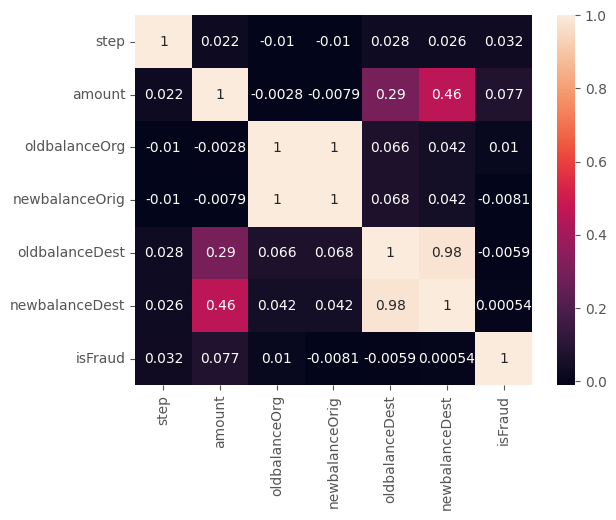

In [29]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='step', ylabel='Count'>

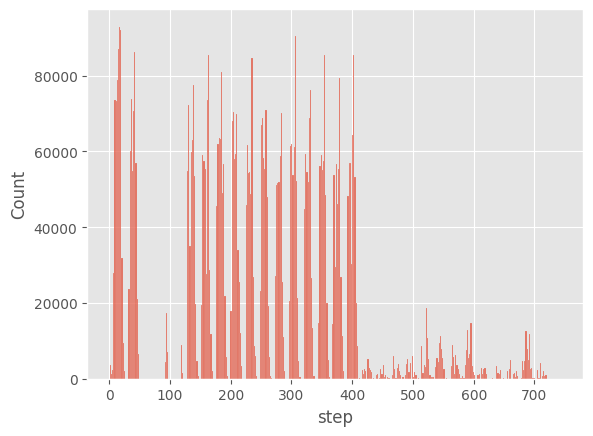

In [30]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

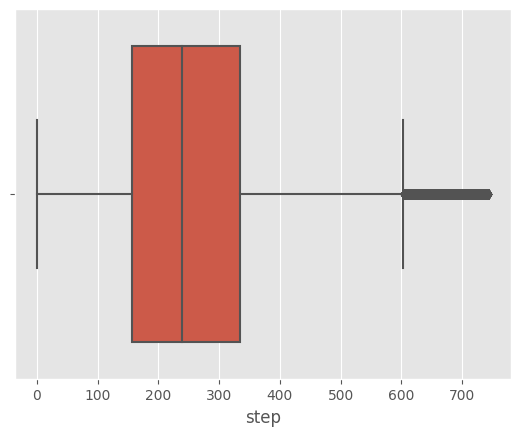

In [31]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

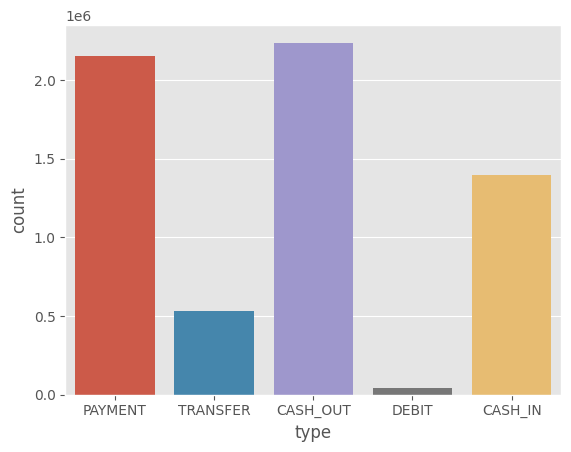

In [32]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

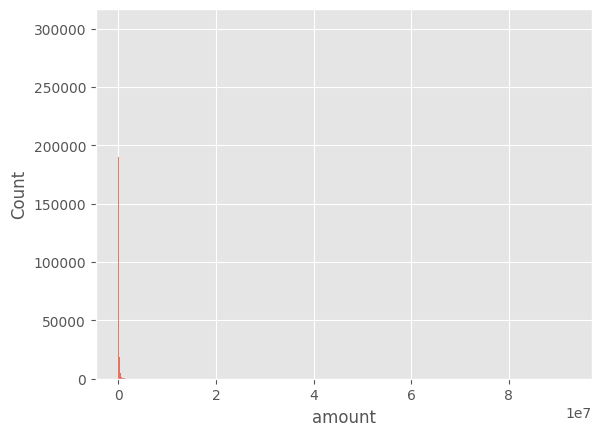

In [33]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

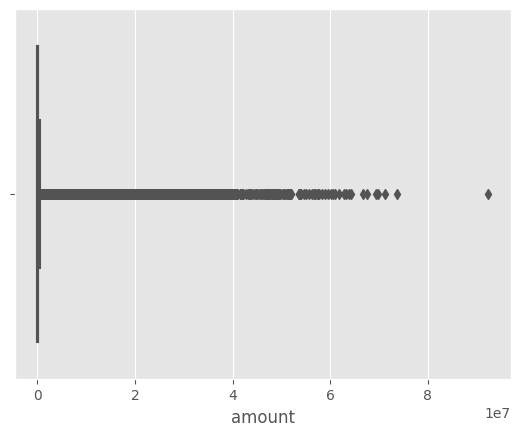

In [34]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

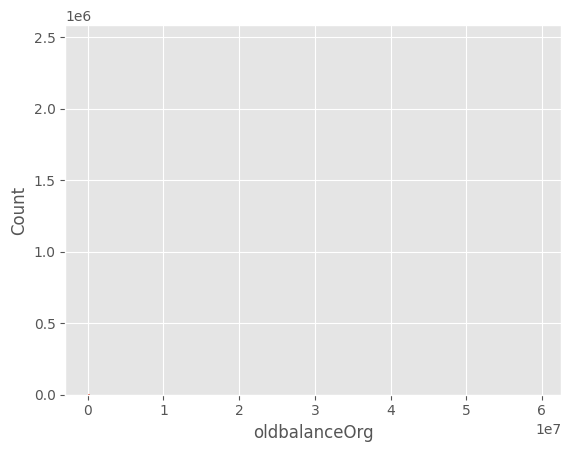

In [35]:
sns.histplot(data=df,x='oldbalanceOrg')

In [36]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

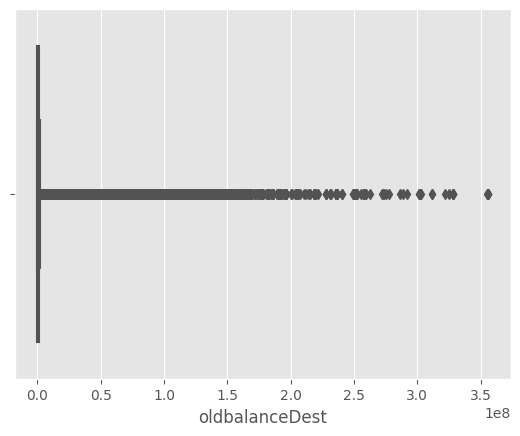

In [37]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

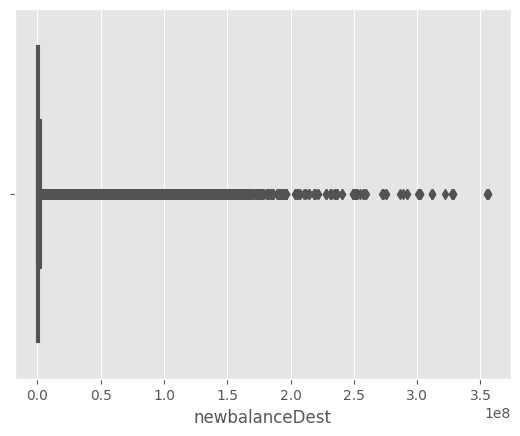

In [38]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

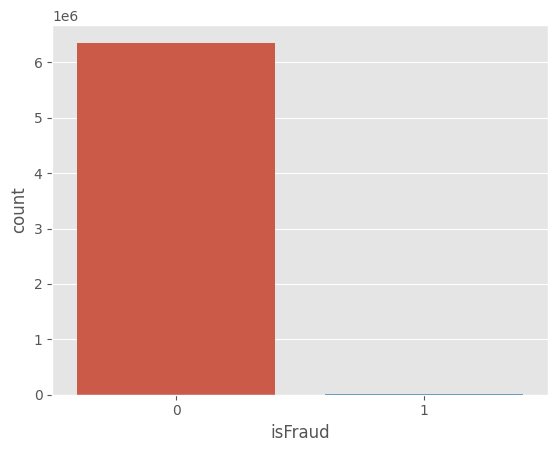

In [39]:
sns.countplot(data=df,x='isFraud')

In [40]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [41]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'

In [42]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,is Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,is Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,is Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,is Fraud


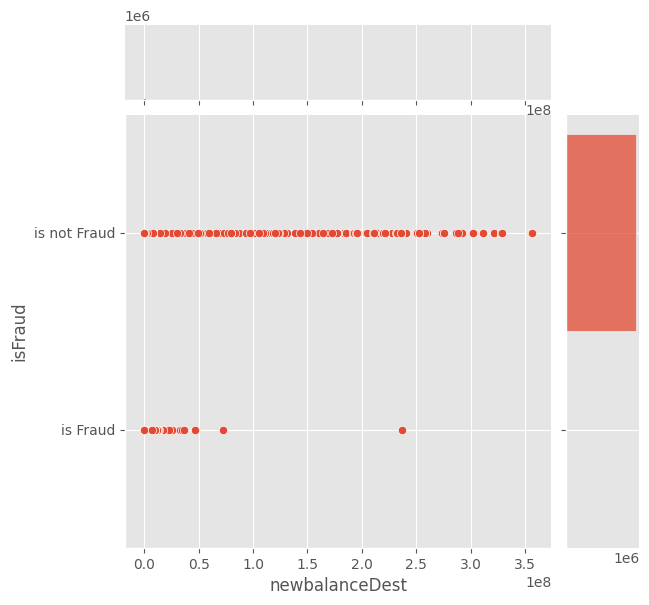

In [43]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

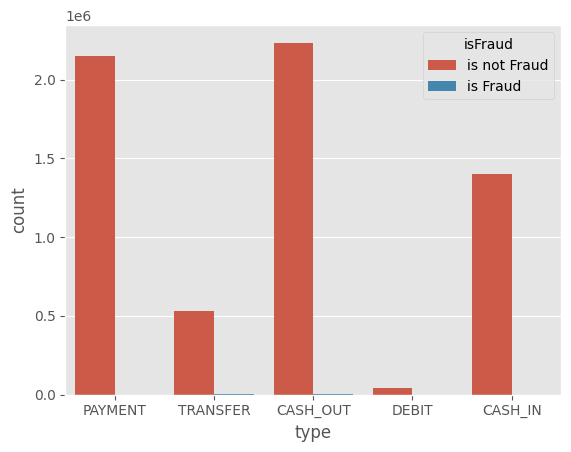

In [44]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

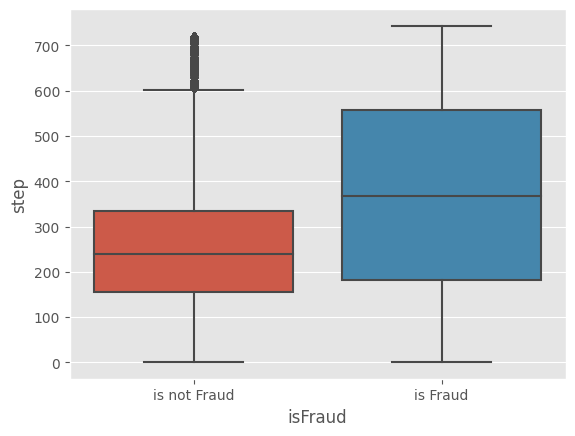

In [45]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

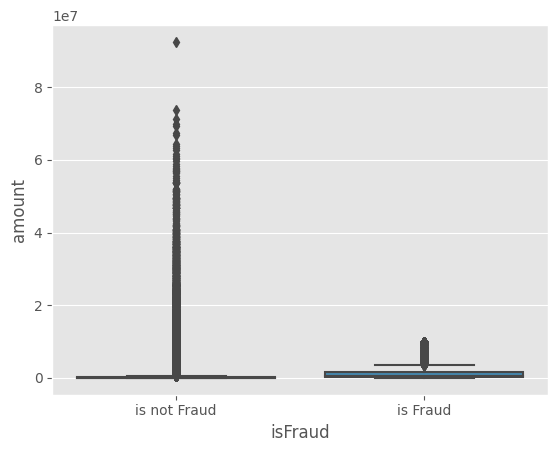

In [46]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

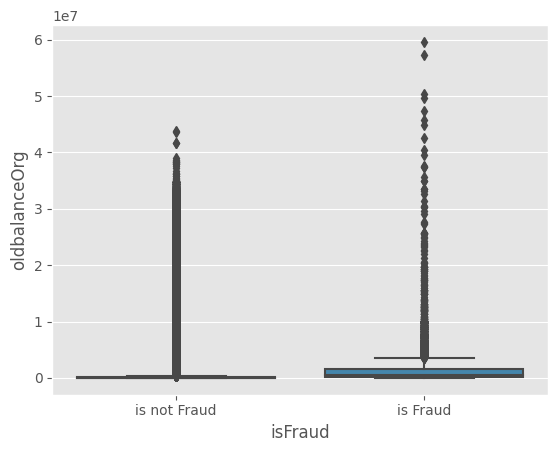

In [47]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

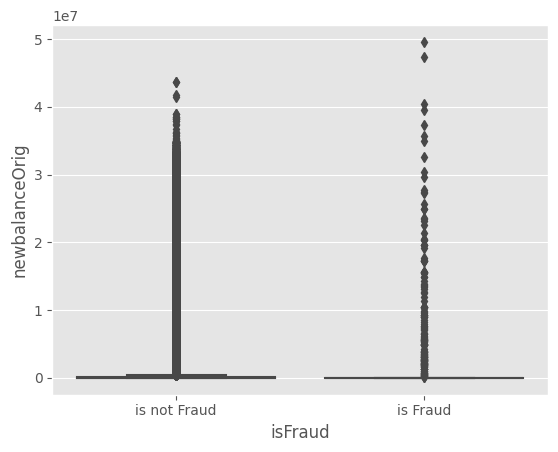

In [48]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

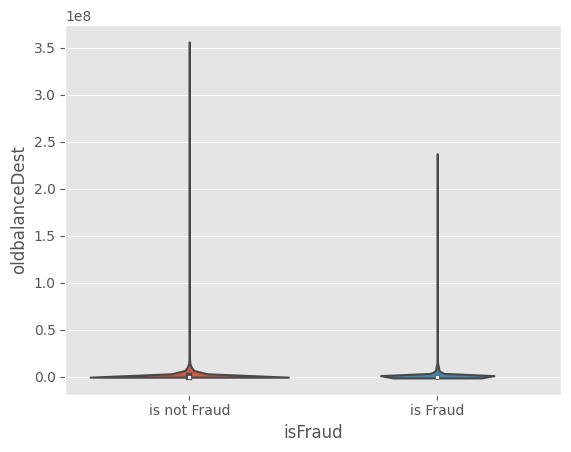

In [49]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

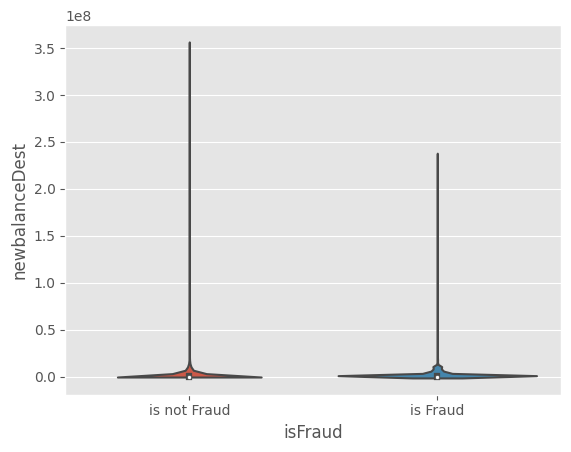

In [50]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [51]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,is not Fraud
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN


In [52]:
df.shape

(6362620, 10)

In [53]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [54]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


In [55]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [56]:
df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         object 
dtypes: float64(5), int64(1), object(2)
memory usage: 388.3+ MB


<Axes: >

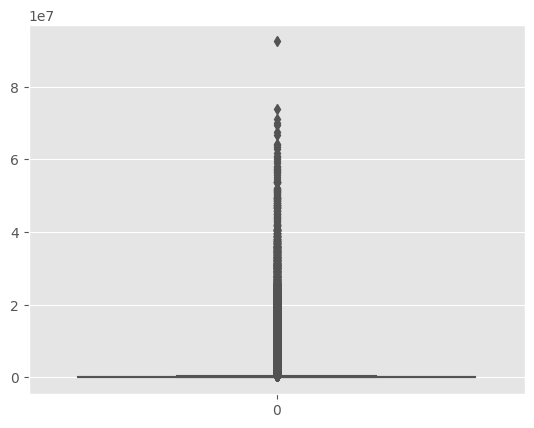

In [58]:
sns.boxplot(df['amount'])

In [59]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=array([10000000.]), count=array([3207]))
179861.90354913071


In [60]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)



In [61]:
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print('q1 :',q1) 
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('skewed data :',len(df[df['amount']>upper_bound]))
print('skewed data :',len(df[df['amount']<lower_bound]))

q1 : 13389.57
q3 : 208721.4775
IQR : 195331.9075
Upper Bound : 501719.33875
Lower Bound : -279608.29125
skewed data : 338078
skewed data : 0


In [62]:
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.displot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=plt)

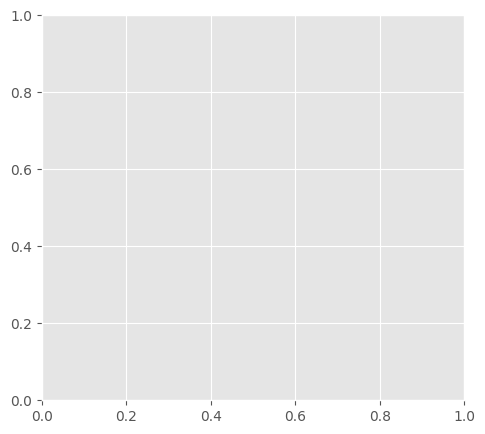

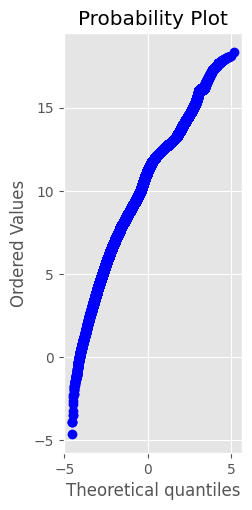

In [63]:
transformationPlot(np.log(df['amount']))

In [64]:
df['amount']=np.log(df['amount'])

In [65]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [66]:
df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [67]:
df=df.head(500000)

In [68]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [69]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.0,160296.36,0.00,0.00
1,1,3,7.530630,21249.0,19384.72,0.00,0.00
2,1,4,5.198497,181.0,0.00,0.00,0.00
3,1,1,5.198497,181.0,0.00,21182.00,0.00
4,1,3,9.364617,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
499995,20,1,11.259533,402794.6,325178.28,662541.78,410073.66
499996,20,1,11.055043,8500.0,0.00,0.00,63262.20
499997,20,3,9.617091,5253.0,0.00,0.00,0.00
499998,20,4,12.781642,0.0,0.00,6533824.07,6889452.78


In [70]:
y

0         is not Fraud
1         is not Fraud
2             is Fraud
3             is Fraud
4         is not Fraud
              ...     
499995    is not Fraud
499996    is not Fraud
499997    is not Fraud
499998    is not Fraud
499999    is not Fraud
Name: isFraud, Length: 500000, dtype: object

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.5)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(250000, 7)
(250000, 7)
(250000,)
(250000,)


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.99972

In [74]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [75]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,55,67
is not Fraud,3,249875


In [76]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.95      0.45      0.61       122
is not Fraud       1.00      1.00      1.00    249878

    accuracy                           1.00    250000
   macro avg       0.97      0.73      0.81    250000
weighted avg       1.00      1.00      1.00    250000



In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.999516

In [78]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [79]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,57,65
is not Fraud,56,249822


In [80]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.50      0.47      0.49       122
is not Fraud       1.00      1.00      1.00    249878

    accuracy                           1.00    250000
   macro avg       0.75      0.73      0.74    250000
weighted avg       1.00      1.00      1.00    250000



In [81]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

0.999628

In [82]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [83]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,32,90
is not Fraud,3,249875


In [84]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.91      0.26      0.41       122
is not Fraud       1.00      1.00      1.00    249878

    accuracy                           1.00    250000
   macro avg       0.96      0.63      0.70    250000
weighted avg       1.00      1.00      1.00    250000



In [85]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.999524

In [86]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.999584

In [87]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,3,119
is not Fraud,0,249878


In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       1.00      0.02      0.05       122
is not Fraud       1.00      1.00      1.00    249878

    accuracy                           1.00    250000
   macro avg       1.00      0.51      0.52    250000
weighted avg       1.00      1.00      1.00    250000



In [92]:
df['isFraud'] = la.fit_transform(df['isFraud'])
df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
x = df.drop('isFraud',axis=1)
y = df['isFraud']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [93]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.0,160296.36,0.00,0.00,1
1,1,3,7.530630,21249.0,19384.72,0.00,0.00,1
2,1,4,5.198497,181.0,0.00,0.00,0.00,0
3,1,1,5.198497,181.0,0.00,21182.00,0.00,0
4,1,3,9.364617,41554.0,29885.86,0.00,0.00,1
...,...,...,...,...,...,...,...,...
499995,20,1,11.259533,402794.6,325178.28,662541.78,410073.66,1
499996,20,1,11.055043,8500.0,0.00,0.00,63262.20,1
499997,20,3,9.617091,5253.0,0.00,0.00,0.00,1
499998,20,4,12.781642,0.0,0.00,6533824.07,6889452.78,1


In [94]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict5)
test_accuracy

0.99976

In [95]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict5)
train_accuracy

0.9999725

In [96]:
pd.crosstab(y_test,y_test_predict5)

col_0,0,1
isFraud,,
0,29,24
1,0,99947


In [97]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        53
           1       1.00      1.00      1.00     99947

    accuracy                           1.00    100000
   macro avg       1.00      0.77      0.85    100000
weighted avg       1.00      1.00      1.00    100000



In [113]:
import pickle
pickle.dump(xgb1,open('payments.pkl','wb'))